In [2]:
import numpy as np
from sklearn import datasets
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.cm as cm

In [3]:
iris = datasets.load_iris()
source = iris.data
target = iris.target[:150]
source = source[:150,:2]


In [4]:
minima = min(target) 
maxima = max(target)
norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Blues_r)


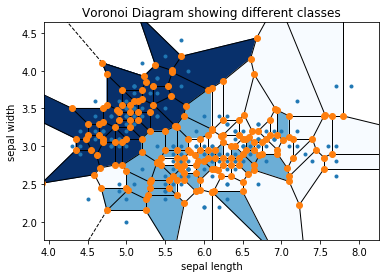

In [8]:
X = source[:,0]
Y = source[:,1]

vor = Voronoi(source)

voronoi_plot_2d(vor)
for r in range(len(vor.point_region)):
    region = vor.regions[vor.point_region[r]]
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(target[r]))
 
plt.title('Voronoi Diagram showing different classes')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()
